In [115]:
from cdlib.algorithms import louvain, surprise_communities, leiden, walktrap
from matplotlib.colors import ListedColormap
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

RANDOM_SEED = 671
NUM_CAST = 10

In [116]:
all_data = pd.read_csv("movies.csv")
all_data.head()
people = all_data[["director_name", "writer_name", "cast_name"]]
people.head()
movie_casts = people["cast_name"]
cast_graph = nx.Graph()
i = 0
for movie in movie_casts:
    i += 1
    if i <= 1000:
        casts = movie.split(",")
        casts = casts[:NUM_CAST]
        casts = combinations(casts, 2)
        for cast_pair in casts:
            cast_graph.add_edge(*cast_pair)
connected_components = list(nx.connected_components(cast_graph))
largest_component = max(connected_components, key=len)
cast_graph = cast_graph.subgraph(largest_component)

In [117]:
print(cast_graph.number_of_nodes())
print(cast_graph.number_of_edges())
print(len(list(nx.connected_components(cast_graph))))

238
509
1


In [118]:
genre_set = set()
cast_genre_dict = dict()
for i in range(len(all_data)):
    movie = all_data.iloc[i,:]
    genre_list = movie.genre.split(",")
    cast_list = movie.cast_name.split(",")
    cast_list = cast_list[:NUM_CAST]
    for cast in cast_list:
        for genre in genre_list:
            if genre not in ["Music", "Musical", "History", "Fantasy", "Romance", "Western", "Family", "Sport", "Film-Noir"]:
                genre_set.add(genre)
                if cast in cast_genre_dict:
                    cast_genre_dict[cast].append(genre)
                else:
                    cast_genre_dict[cast] = [genre]
            elif cast not in cast_genre_dict:
                cast_genre_dict[cast] = ["Other"]
                

In [119]:
genre_set

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'War'}

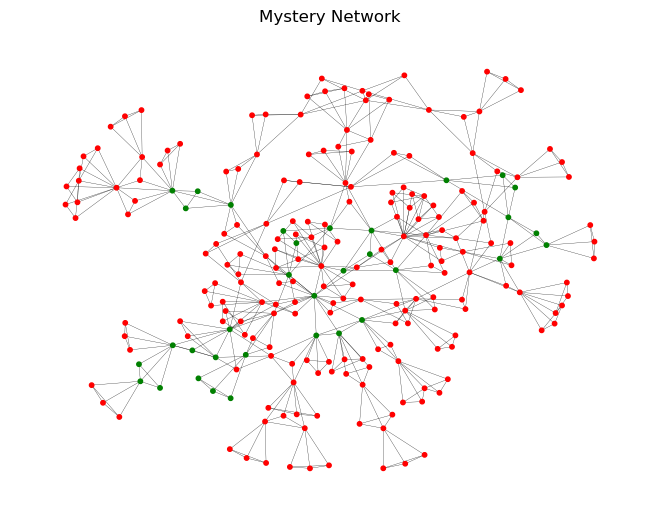

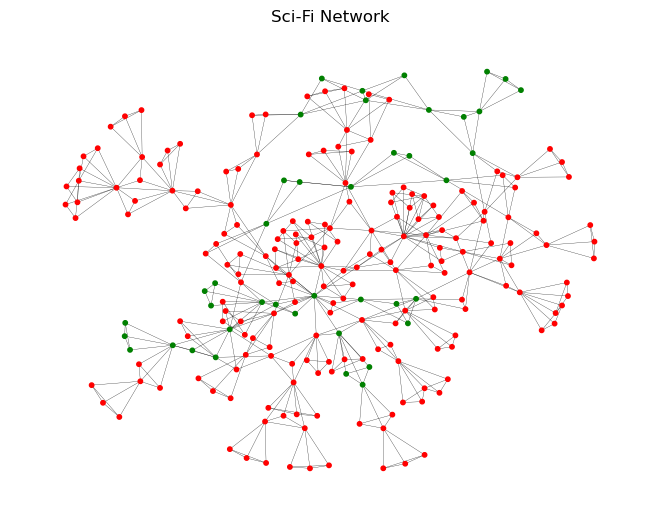

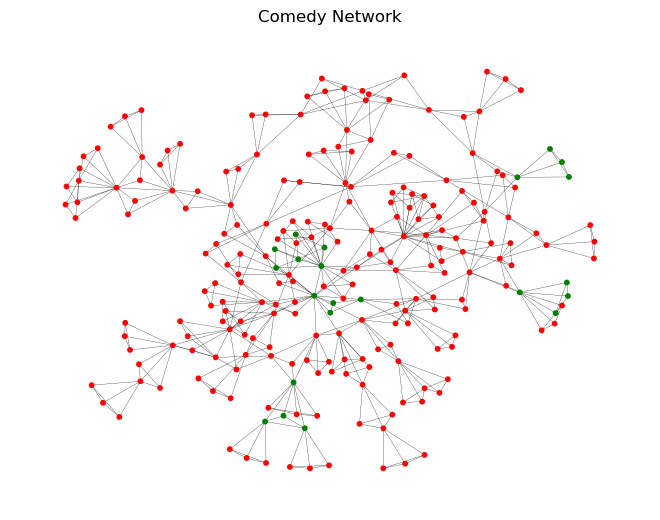

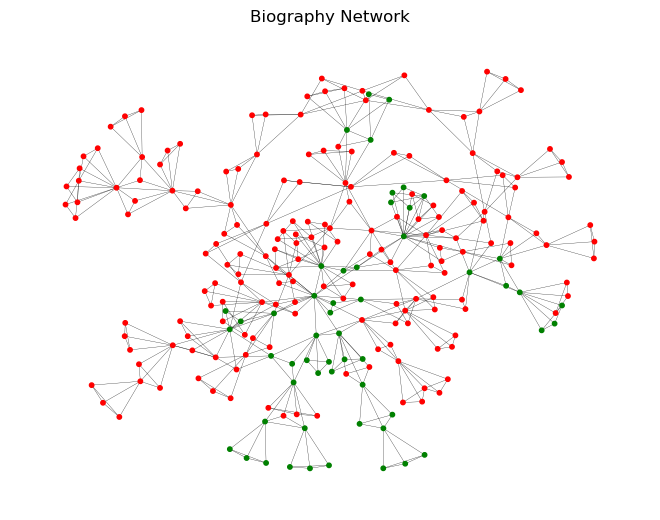

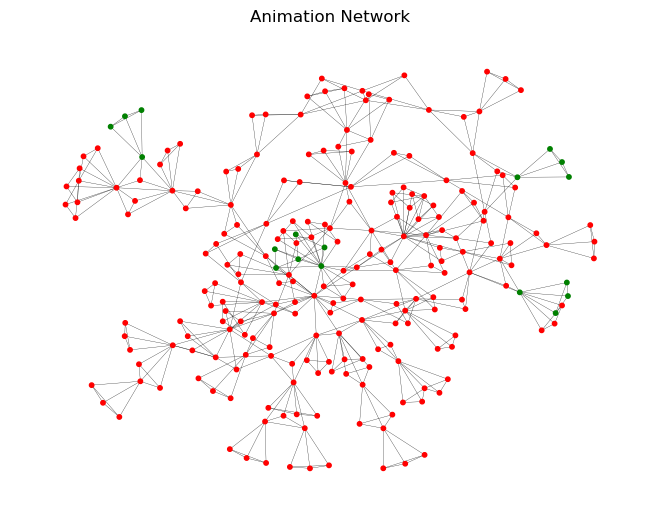

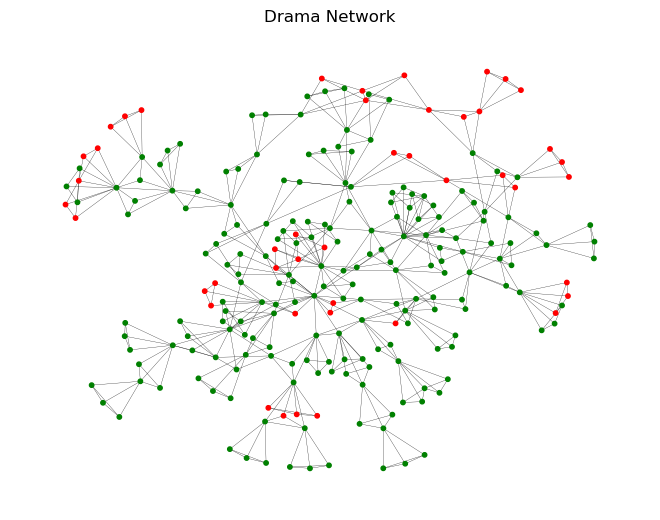

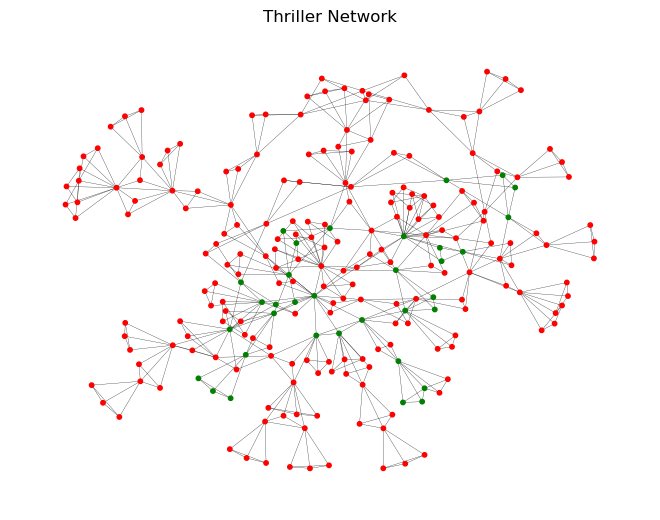

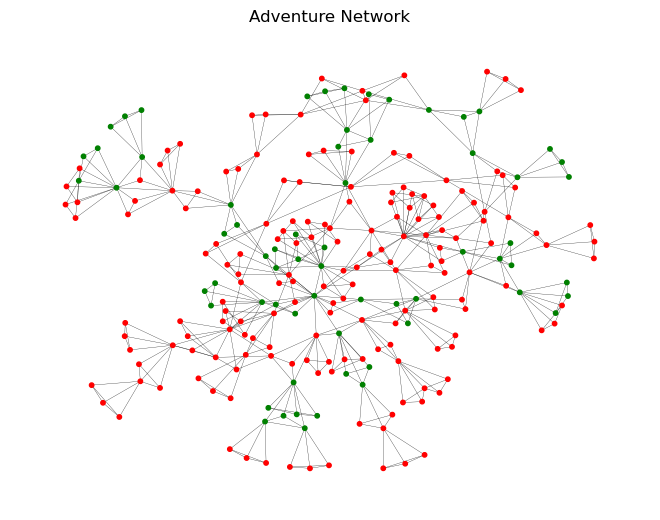

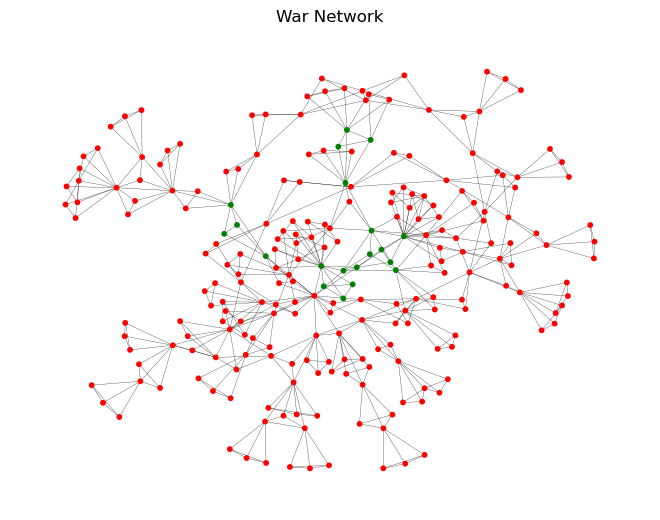

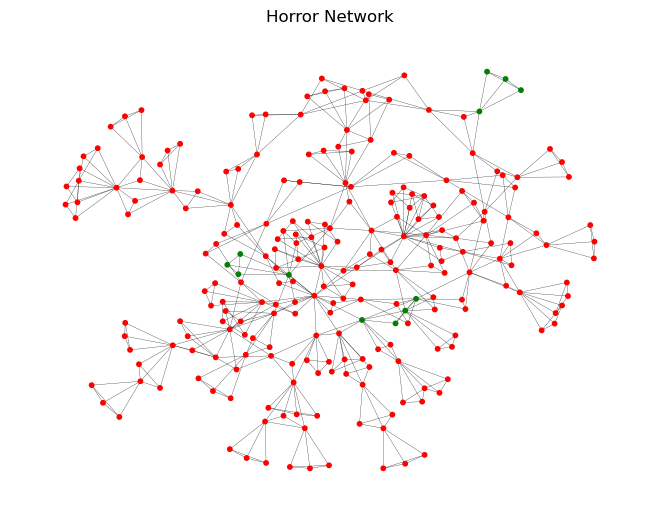

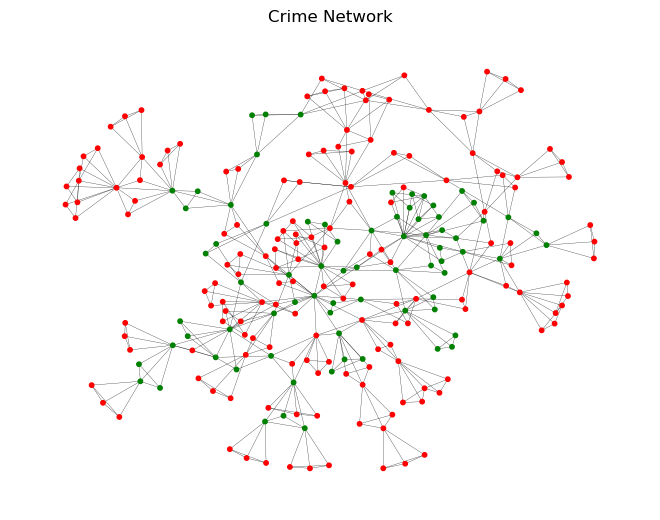

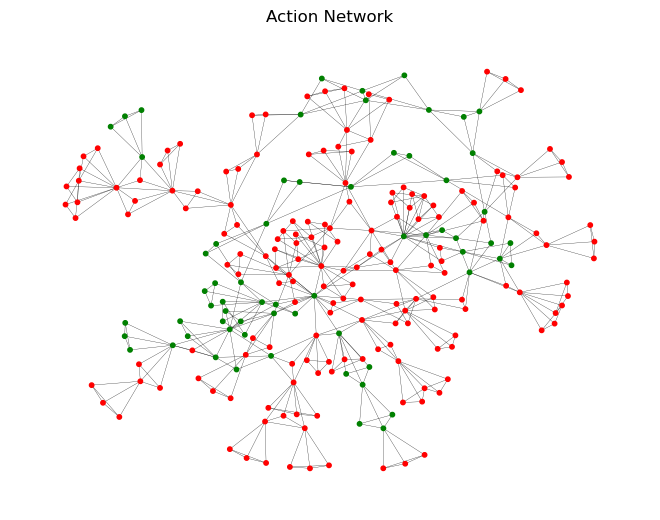

In [120]:
pos = nx.kamada_kawai_layout(cast_graph)
for cur_genre in genre_set:
    # colors = create_color_list(num_communities)
    # community_cmap = ListedColormap(colors)
    # pos = nx.spring_layout(cast_graph, seed=RANDOM_SEED)
    
    # colors = ["red", "green"]
    node_color = []
    for node in cast_graph.nodes:
        if cur_genre in cast_genre_dict[node]:
            node_color.append("green")
        else:
            node_color.append("red")
    # [com_idx for com_idx, nodes in enumerate(coms.communities) for _ in nodes]
    nx.draw(cast_graph, pos, node_color=node_color, with_labels=False, font_weight='bold', node_size=10, width=0.2)
    plt.title(f'{cur_genre} Network')
    # plt.legend(loc='best')
    plt.show()